<a href="https://colab.research.google.com/github/kulight/life_expectency_regression/blob/master/LifeExpectancy_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life expectancy prediction models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

pd.options.display.max_columns = None

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading data post EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
gpath = '/content/drive/My Drive/datasets/'

In [4]:
le = pd.read_csv(f'{gpath}Cleaned Life Expectancy Data.csv')
le.head()

,country,status,year,life_expectancy,adult_mortality,alcohol,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_10-19_years,income_composition_of_resources,schooling
0,Afghanistan,1,16,65.0,263.0,0.01,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1
1,Afghanistan,1,15,59.9,271.0,0.01,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,10.0
2,Afghanistan,1,14,59.9,268.0,0.01,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,9.9
3,Afghanistan,1,13,59.5,272.0,0.01,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,9.8
4,Afghanistan,1,12,59.2,275.0,0.01,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,9.5


## Peparing data for models
- Creating dummy vars from countries

In [5]:
def rmse(y_true, y_pred):
    se = (y_true - y_pred)**2
    mse = se.to_numpy().mean()
    return np.sqrt(mse)

In [6]:
le = pd.get_dummies(data=le, columns=['country'], drop_first=True)
le.head()

,status,year,life_expectancy,adult_mortality,alcohol,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_10-19_years,income_composition_of_resources,schooling,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Monaco,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,1,16,65.0,263.0,0.01,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [7]:
X = le.drop(['life_expectancy'], axis=1)
y = le[['life_expectancy']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4881)

## Running baseline LR model

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(f'Training score: {lr_model.score(X_train, y_train)}')
print(f'Test score: {lr_model.score(X_test, y_test)}')

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print(f'RMSE train: {rmse(y_train, y_train_pred)}')
print(f'RMSE test: {rmse(y_test, y_test_pred)}')

Training score: 0.9644628302634556
Test score: 0.9535061584678499
RMSE train: 1.7781890509766556
RMSE test: 2.0751822878350765


## Creating collection of models to test

In [10]:
models = {
    'LinearRegression':{'model': LinearRegression(n_jobs=3)},
    'RidgeCV' : {'model' : RidgeCV(cv=5, normalize=True)},
    'LassoCV' : {'model' : LassoCV(cv=5, normalize=True, n_jobs=3)},
    'ElasticNetCV' : {'model' : ElasticNetCV(cv=5, n_alphas=5, n_jobs=3)},
    'RandomForestRegressor' : {'model' : RandomForestRegressor(n_estimators=20, random_state=0)}}



## Running the models. Training and predicting

In [11]:
for name, model in models.items():
    steps = []
    
    # if(name != 'RandomForestRegressor'):
    #     steps = [('scalar', StandardScaler()),
    #             ('poly', PolynomialFeatures(degree=2)),
    #             ('model', model['model'])]
    # else:
    steps = [('scalar', StandardScaler()),
             ('model', model['model'])]

    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)


    model['pipe'] = pipeline
    print('\n')
    print(name)

    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    model['score'] = test_score
    print(f'Training score: {train_score}')
    print(f'Test score: {test_score}')

    y_train_pred = pipeline.predict(X_train).reshape(-1, 1)
    y_test_pred = pipeline.predict(X_test).reshape(-1, 1)
    model['y_test_pred'] = y_test_pred
    train_rmse = rmse(y_train, y_train_pred)
    test_rmse = rmse(y_test,y_test_pred)
    model['rmse'] = test_rmse
    print(f'RMSE train: {train_rmse}')
    print(f'RMSE test: {test_rmse}')





LinearRegression
Training score: 0.9644394007858768
Test score: 0.953393086184043
RMSE train: 1.7787751299494468
RMSE test: 2.077704160651938


RidgeCV
Training score: 0.4886620568049687
Test score: 0.4793999971725656
RMSE train: 6.7451330948818535
RMSE test: 6.944014507379428


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




LassoCV
Training score: 0.9629312169304551
Test score: 0.9525029417152034
RMSE train: 1.8161038449821
RMSE test: 2.0974513329756257


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




ElasticNetCV
Training score: 0.9618714796672478
Test score: 0.9509360001325822
RMSE train: 1.8418806668432512
RMSE test: 2.1317683581283595


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)




RandomForestRegressor
Training score: 0.993372318940685
Test score: 0.9608211163957593
RMSE train: 0.7679223610315488
RMSE test: 1.9049543148802341


# Evaluting the prediction results

## Comparing rmse value of all models

In [12]:
models_rmse = pd.DataFrame.from_dict({key : model['rmse'] for key, model in models.items()}, orient='index', columns=['rmse'])
models_rmse.reset_index(level=0, inplace=True)
models_rmse.columns = ['model', 'rmse']
models_rmse.sort_values(by='rmse')

,model,rmse
4,RandomForestRegressor,1.904954
0,LinearRegression,2.077704
2,LassoCV,2.097451
3,ElasticNetCV,2.131768
1,RidgeCV,6.944015


## Exploring top 2 models

### Linear regression top features 

In [13]:
model = models['LinearRegression']['pipe']['model']

feats = {}
for feature, importance in zip(X.columns, model.coef_.transpose()):
    feats[feature] = importance[0]

importances = pd.DataFrame.from_dict(feats, orient='index', columns=['importance'])

importances.reset_index(inplace=True)
importances[~importances['index'].str.startswith('country_')].sort_values(by='importance', ascending=False)

,index,importance
0,status,2.355074e+13
1,year,1.125000e+00
14,schooling,5.888672e-01
9,diphtheria,1.640625e-01
12,thinness_10-19_years,1.118164e-01
11,gdp,6.054688e-02
7,polio,4.589844e-02
4,measles,-7.910156e-02
8,total_expenditure,-8.129883e-02
13,income_composition_of_resources,-8.984375e-02


### RandomForestRegressor top features 

In [14]:
model = models['RandomForestRegressor']['pipe']['model']

feats = {}
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index', columns=['importance'])
importances[abs(importances['importance']) > 0.001].sort_values(by='importance', ascending=False)

,importance
hiv/aids,0.594986
adult_mortality,0.146693
income_composition_of_resources,0.110843
status,0.038813
schooling,0.021759
under-five_deaths,0.020262
bmi,0.014992
thinness_10-19_years,0.008007
alcohol,0.005509
year,0.005013


### Create results dataframe so we can evaluate the result

In [15]:
res = y_test.assign(RF_Predicted_LE = models['RandomForestRegressor']['y_test_pred']).assign(LR_Predicted_LE = models['LinearRegression']['y_test_pred'])
res_sorted = res.sort_values(by='life_expectancy')
res_sorted.reset_index(drop=True, inplace=True)
res_sorted.head()

,life_expectancy,RF_Predicted_LE,LR_Predicted_LE
0,41.5,48.420,45.559090
1,44.0,48.180,46.576668
2,44.8,45.290,42.886239
3,45.3,44.055,41.612855
4,45.7,47.395,46.180184


### Lookig at Linear regression highest errors. Check if we can spot anything

In [16]:
le.loc[res.loc[abs(res['life_expectancy'] - res['LR_Predicted_LE']) > 7].index]

,status,year,life_expectancy,adult_mortality,alcohol,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_10-19_years,income_composition_of_resources,schooling,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Monaco,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
938,2,8,89.0,89.0,12.20,39.0,58.6,3.0,99.0,1.45,98.0,0.1,416.583970,0.6,0.873,16.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Lookig at Random forest highest errors. Check if we can spot anything

In [17]:
le.loc[res.loc[abs(res['life_expectancy'] - res['RF_Predicted_LE']) > 7].index]

,status,year,life_expectancy,adult_mortality,alcohol,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_10-19_years,income_composition_of_resources,schooling,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Monaco,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
433,1,15,52.8,47.0,0.01,50.0,27.4,80.0,76.0,5.72,76.0,2.0,1766.947595,5.6,0.677,12.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

## Comparing both models predictions (red line) to the identity line (yellow line). 

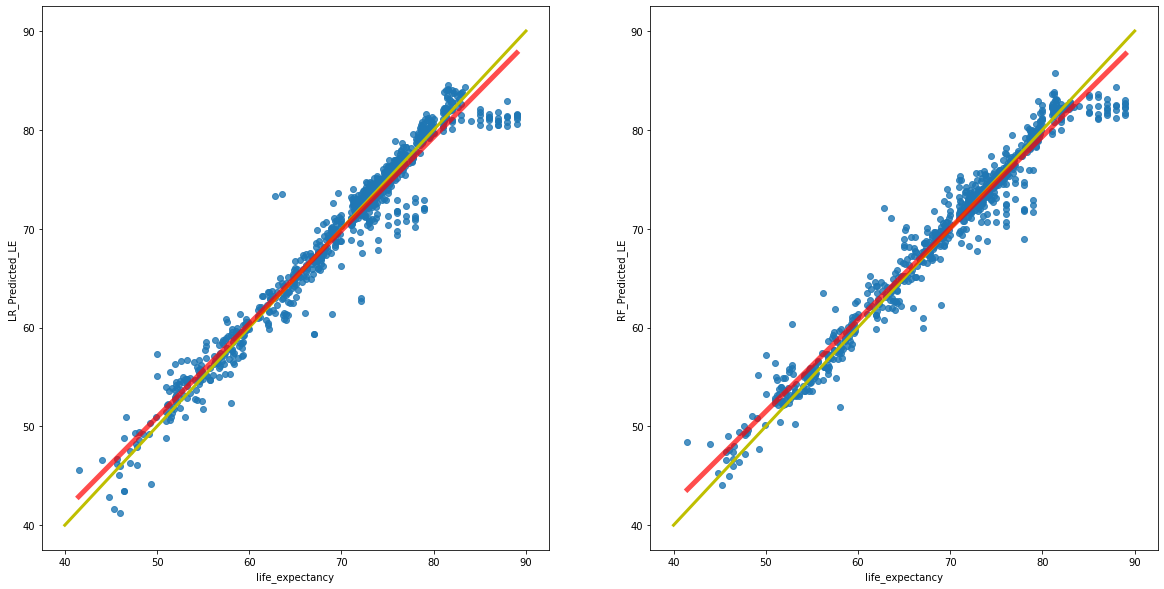

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(np.linspace(40, 90, 2), np.linspace(40, 90, 2), linewidth=3, color='y')
sns.regplot(ax=ax1, x='life_expectancy', y='LR_Predicted_LE', data=res_sorted, ci=None, line_kws={"color":"r","alpha":0.7,"lw":5})

ax2.plot(np.linspace(40, 90, 2), np.linspace(40, 90, 2), linewidth=3, color='y')
sns.regplot(ax=ax2, x='life_expectancy', y='RF_Predicted_LE', data=res_sorted, ci=None, line_kws={"color":"r","alpha":0.7,"lw":5})

## Comparing both models predictions to the identity line (red line). 

In [19]:
melted_res = pd.melt(res_sorted, id_vars=['life_expectancy'], value_vars=['LR_Predicted_LE', 'RF_Predicted_LE'])
melted_res.columns = ['life_expectancy', 'model', 'prediction']

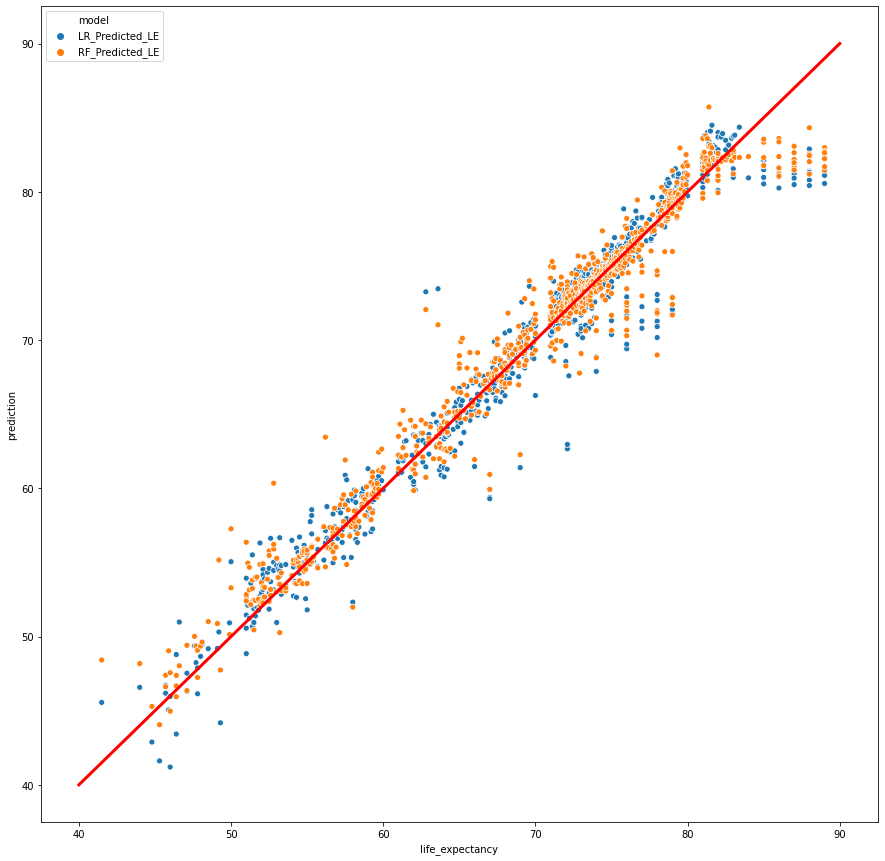

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(np.linspace(40, 90, 2), np.linspace(40, 90, 2), linewidth=3, color='r')
sns.scatterplot(x='life_expectancy', y='prediction', data=melted_res, ax=ax, ci=None, hue='model')

## Distribution of predictions
- Random forest is less varied and more consistent in its prediction

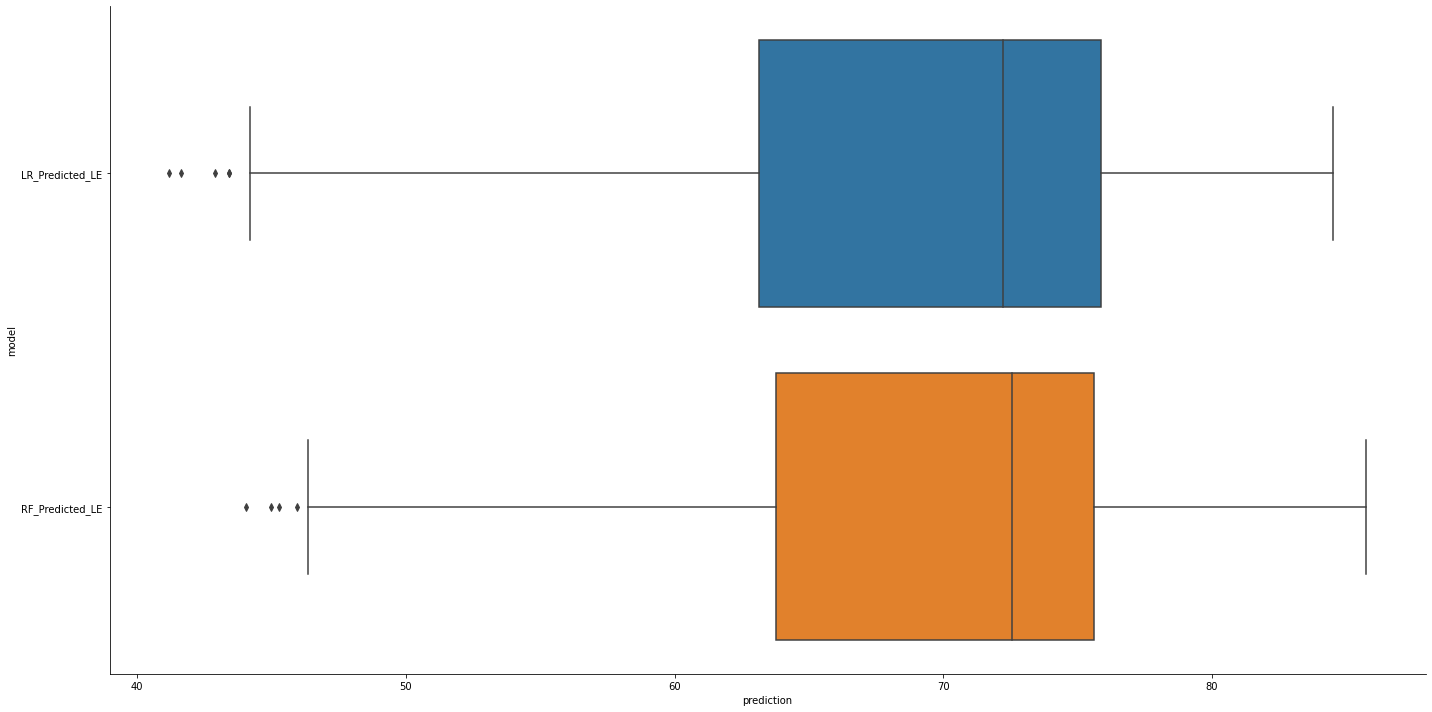

In [21]:
sns.catplot(x="prediction", y="model",
                kind="box", orient="h", height=10, aspect=2,
                data=melted_res)

## Comparing both models predictions 
- It is noticeable that RF is grouped closer to the regression line

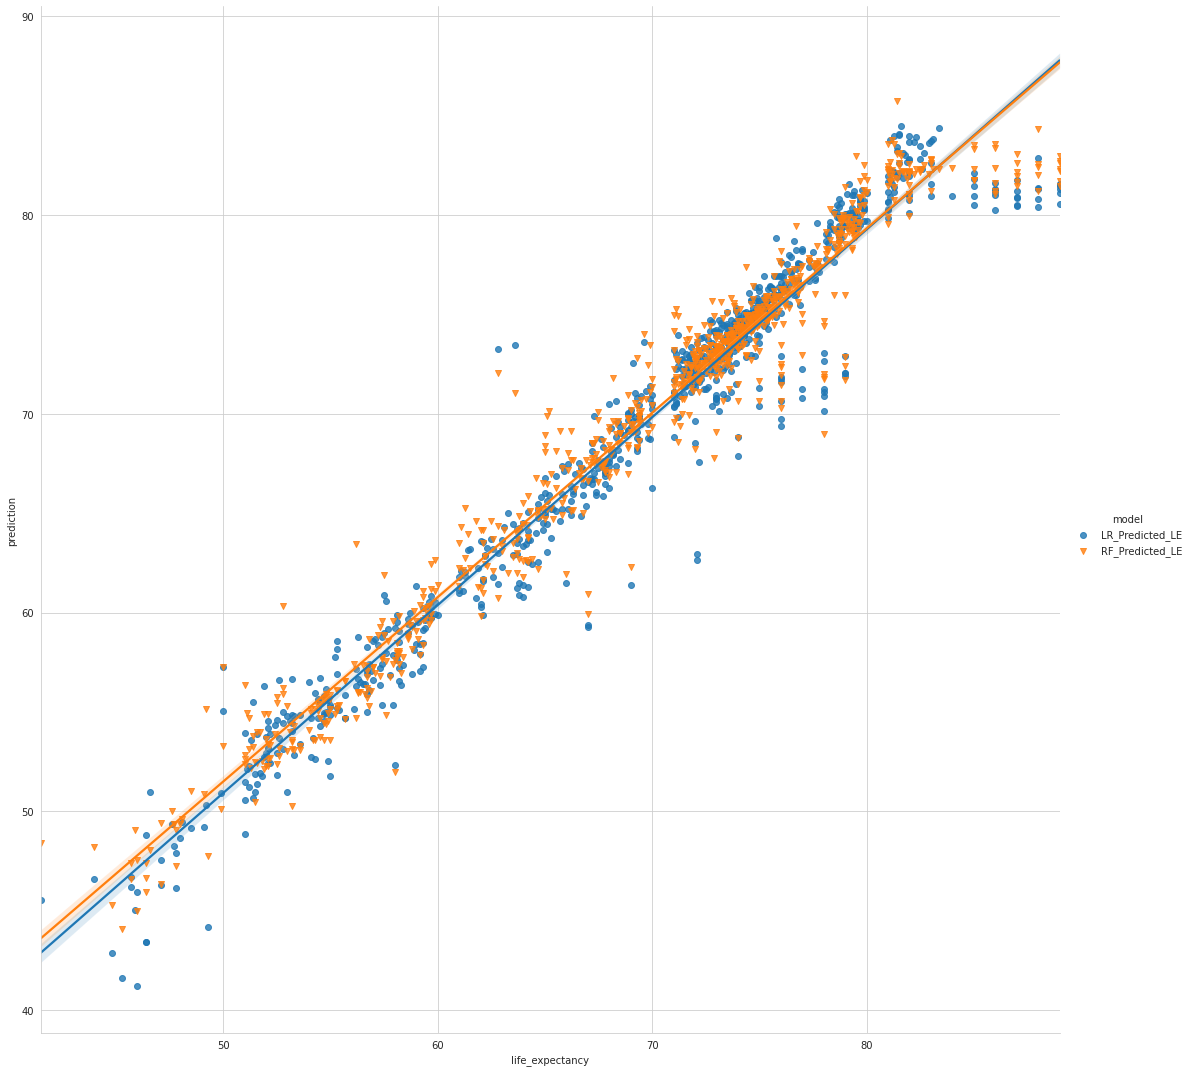

In [22]:
sns.set_style('whitegrid') 
sns.lmplot(x ='life_expectancy', y ='prediction', data = melted_res, hue ='model', markers =['o', 'v'], height=15)

# Running models predictions on the full LE dataset
- Results are improved, assuming predicting the training set is the reason.

In [23]:
X_full = le.drop(['life_expectancy'], axis=1)
res_full = le.assign(RF_Predicted_LE = models['RandomForestRegressor']['pipe'].predict(X_full)).assign(LR_Predicted_LE = models['LinearRegression']['pipe'].predict(X_full))
res_sorted_full = res_full.sort_values(by='life_expectancy')
res_sorted_full.reset_index(drop=True, inplace=True)
# res_sorted_full.head()

rf_rmse = rmse(res_sorted_full['life_expectancy'], res_sorted_full['RF_Predicted_LE'])
en_rmse = rmse(res_sorted_full['life_expectancy'], res_sorted_full['LR_Predicted_LE'])
print(f'RMSE RF: {rf_rmse}')
print(f'RMSE EN: {en_rmse}')

RMSE RF: 1.2257186854461763
RMSE EN: 1.873577221804989


In [24]:
melted_res_full = pd.melt(res_sorted_full, id_vars=['life_expectancy'], value_vars=['LR_Predicted_LE', 'RF_Predicted_LE'])
melted_res_full.columns = ['life_expectancy', 'model', 'prediction']
melted_res_full

,life_expectancy,model,prediction
0,36.3,LR_Predicted_LE,58.526864
1,39.0,LR_Predicted_LE,43.004403
2,41.0,LR_Predicted_LE,43.254403
3,41.5,LR_Predicted_LE,45.559090
4,42.3,LR_Predicted_LE,44.453621
...,...,...,...
5829,89.0,RF_Predicted_LE,87.115000
5830,89.0,RF_Predicted_LE,87.440000
5831,89.0,RF_Predicted_LE,87.690000
5832,89.0,RF_Predicted_LE,82.635000


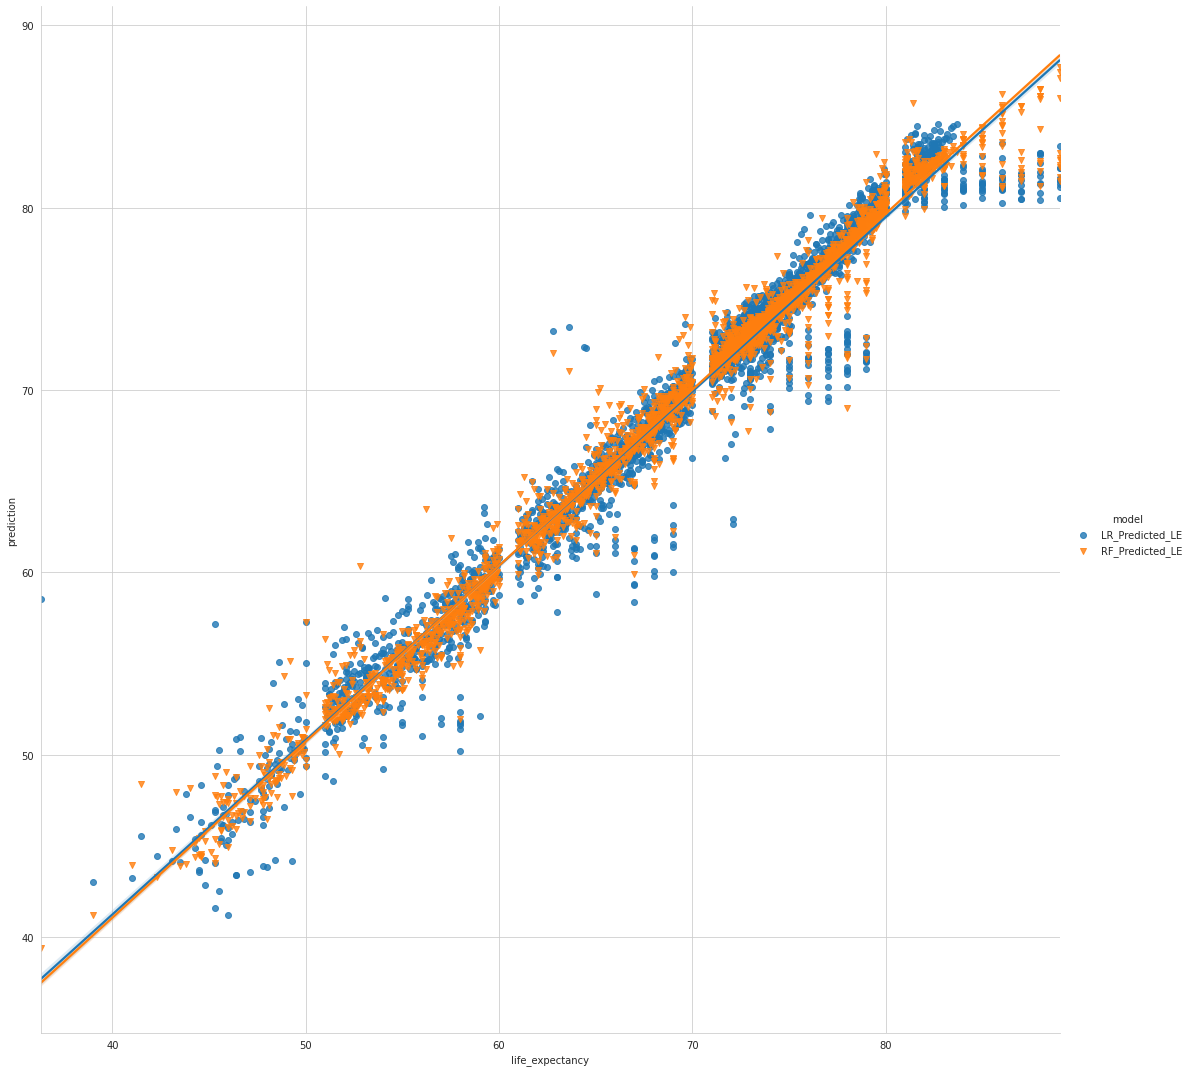

In [25]:
sns.set_style('whitegrid') 
sns.lmplot(x ='life_expectancy', y ='prediction', data = melted_res_full, hue ='model', markers =['o', 'v'], height=15) 